In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tensorflow.keras.applications import resnet
from tensorflow.keras.layers import Dense, Flatten
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.utils import shuffle
from tensorflow.keras.models import Model,load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tqdm import tqdm
import os

In [4]:
cat_len = 2000
annotation_path = r'C:\Users\HP\Desktop\MS\CV\assignment2\train_and_val_set\train_set\annotations'
def read_exp(annotation_path):
    l0 = []
    l1 = []
    l2 = []
    l3 = []
    l4 = []
    l5 = []
    l6 = []
    l7 = []

    for file in tqdm(os.listdir(annotation_path)):
        name, ext = os.path.splitext(file)

        # if the file is a npy file, read it using np.load and append it to the corresponding list based on the file name
        if ext == ".npy" and name.endswith("_exp"):
            filename = os.path.join(annotation_path, file)
            npy_file = np.load(filename)
            if (int(npy_file) == 0 )and (len(l0) < cat_len):
                l0.append(file[:-8])
            elif (int(npy_file) == 1) and (len(l1) < cat_len):
                l1.append(file[:-8])
            elif (int(npy_file) == 2) and (len(l2) < cat_len):
                l2.append(file[:-8])
            elif (int(npy_file) == 3) and (len(l3) < cat_len):
                l3.append(file[:-8])
            elif (int(npy_file) == 4) and (len(l4) < cat_len):
                l4.append(file[:-8])
            elif (int(npy_file) == 5) and (len(l5) < cat_len):
                l5.append(file[:-8])
            elif (int(npy_file) == 6) and (len(l6) < cat_len):
                l6.append(file[:-8])
            elif (int(npy_file) == 7) and (len(l7) < cat_len):
                l7.append(file[:-8])
    return l0,l1,l2,l3,l4,l5,l6,l7
l0,l1,l2,l3,l4,l5,l6,l7 = read_exp(annotation_path)

100%|██████████| 1150604/1150604 [11:30<00:00, 1665.53it/s]


In [3]:
len(l0),len(l1),len(l2),len(l3),len(l4),len(l5),len(l7),len(l6)

(2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000)

In [5]:
images_path = r'C:\Users\HP\Desktop\MS\CV\assignment2\train_and_val_set\train_set\images'
def read_img(images_path,l0,l1,l2,l3,l4,l5,l6,l7):
    i0 = []
    i1 = []
    i2 = []
    i3 = []
    i4 = []
    i5 = []
    i6 = []
    i7 = []

    for file in tqdm(os.listdir(images_path)):
            name,ext = os.path.splitext(file)

            if name in l0:
                  filename = os.path.join(images_path,file)
                  i0.append(filename)
            elif name in l1:
                  filename = os.path.join(images_path,file)
                  i1.append(filename)
            elif name in l2:
                  filename = os.path.join(images_path,file)
                  i2.append(filename)
            elif name in l3:
                  filename = os.path.join(images_path,file)
                  i3.append(filename)
            elif name in l4:
                  filename = os.path.join(images_path,file)
                  i4.append(filename)
            elif name in l5:
                  filename = os.path.join(images_path,file)
                  i5.append(filename)
            elif name in l6:
                  filename = os.path.join(images_path,file)
                  i6.append(filename)
            elif name in l7:
                  filename = os.path.join(images_path,file)
                  i7.append(filename)
    return i0,i1,i2,i3,i4,i5,i6,i7
i0,i1,i2,i3,i4,i5,i6,i7 = read_img(images_path,l0,l1,l2,l3,l4,l5,l6,l7)
images_paths = np.array([i0,i1,i2,i3,i4,i5,i6,i7]).reshape(cat_len*8,-1)

100%|██████████| 287651/287651 [01:46<00:00, 2690.66it/s]


In [5]:
len(i0),len(i1),len(i2),len(i3),len(i4),len(i5),len(i6),len(i7)

(2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000)

In [6]:
def read_val(annotation_path,l0,l1,l2,l3,l4,l5,l6,l7):
    v0 = []
    v1 = []
    v2 = []
    v3 = []
    v4 = []
    v5 = []
    v6 = []
    v7 = []

    for file in tqdm(os.listdir(annotation_path)):
       name,ext = os.path.splitext(file)
       if ext == '.npy' and name.endswith('_val'):
           name = name[:-4]
           if name in l0:
              valence = float(np.load(os.path.join(annotation_path,file)))
              v0.append(valence)
           elif name in l1:
               valence = float(np.load(os.path.join(annotation_path,file)))
               v1.append(valence)
           elif name in l2:
               valence = float(np.load(os.path.join(annotation_path,file)))
               v2.append(valence)
           elif name in l3:
               valence = float(np.load(os.path.join(annotation_path,file)))
               v3.append(valence)
           elif name in l4:
               valence = float(np.load(os.path.join(annotation_path,file)))
               v4.append(valence)
           elif name in l5:
               valence = float(np.load(os.path.join(annotation_path,file)))
               v5.append(valence)
           elif name in l6:
               valence = float(np.load(os.path.join(annotation_path,file)))
               v6.append(valence)
           elif name in l7:
               valence = float(np.load(os.path.join(annotation_path,file)))
               v7.append(valence)
    return v0,v1,v2,v3,v4,v5,v6,v7
v0,v1,v2,v3,v4,v5,v6,v7 = read_val(annotation_path,l0,l1,l2,l3,l4,l5,l6,l7)
valence_val = np.array((v0,v1,v2,v3,v4,v5,v6,v7)).reshape(cat_len*8,-1)

100%|██████████| 1150604/1150604 [03:42<00:00, 5166.12it/s] 


In [7]:
len(v0),len(v1),len(v2),len(v3),len(v4),len(v5),len(v6),len(v7)

(2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000)

In [8]:
valence_val[:5]

array([[ 0.0896593],
       [-0.0677507],
       [ 0.300039 ],
       [-0.0952381],
       [-0.047619 ]])

In [7]:
def read_aro(annotation_path,l0,l1,l2,l3,l4,l5,l6,l7):
    a0 = []
    a1 = []
    a2 = []
    a3 = []
    a4 = []
    a5 = []
    a6 = []
    a7 = []

    for file in tqdm(os.listdir(annotation_path)):
       name,ext = os.path.splitext(file)
       if ext == '.npy' and name.endswith('_aro'):
           name = name[:-4]
           if name in l0:
              arousal = int(np.load(os.path.join(annotation_path,file)))
              v0.append(arousal)
           elif name in l1:
               arousal= int(np.load(os.path.join(annotation_path,file)))
               a1.append(arousal)
           elif name in l2:
               arousal = int(np.load(os.path.join(annotation_path,file)))
               a2.append(arousal)
           elif name in l3:
               arousal = int(np.load(os.path.join(annotation_path,file)))
               a3.append(arousal)
           elif name in l4:
               arousal = int(np.load(os.path.join(annotation_path,file)))
               a4.append(arousal)
           elif name in l5:
               arousal = int(np.load(os.path.join(annotation_path,file)))
               a5.append(arousal)
           elif name in l6:
               arousal = int(np.load(os.path.join(annotation_path,file)))
               a6.append(arousal)
           elif name in l7:
               arousal = int(np.load(os.path.join(annotation_path,file)))
               a7.append(arousal)
    return a0,a1,a2,a3,a4,a5,a6,a7
a0,a1,a2,a3,a4,a5,a6,a7 = read_val(annotation_path,l0,l1,l2,l3,l4,l5,l6,l7)
arousal_val = np.array((a0,a1,a2,a3,a4,a5,a6,a7)).reshape(cat_len*8,-1)

100%|██████████| 1150604/1150604 [02:04<00:00, 9225.18it/s] 


In [10]:
len(a0),len(a1),len(a2),len(a3),len(a4),len(a5),len(a6),len(a7)

(2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000)

In [8]:
labels = np.array((np.zeros(cat_len),np.ones(cat_len),2*np.ones(cat_len),3*np.ones(cat_len),4*np.ones(cat_len),5*np.ones(cat_len),6*np.ones(cat_len),7*np.ones(cat_len))).reshape(cat_len*8,-1)

In [9]:
images_paths = images_paths.squeeze()
valence_val = valence_val.squeeze()
arousal_val = arousal_val.squeeze()
labels = labels.squeeze()

In [10]:
df = pd.DataFrame({'images_paths':images_paths, 'labels':labels, 'valence':valence_val, 'arousal':arousal_val})
df = shuffle(df)

# Select ratio
ratio = 0.90
 
total_rows = df.shape[0]
train_size = int(total_rows*ratio)
 
# Split data into test and train
train = df[0:train_size]
test = df[train_size:]
df.head()

,images_paths,labels,valence,arousal
3311,C:\Users\HP\Desktop\MS\CV\assignment2\train_an...,1.0,0.779604,0.779604
1131,C:\Users\HP\Desktop\MS\CV\assignment2\train_an...,0.0,0.007937,0.007937
13155,C:\Users\HP\Desktop\MS\CV\assignment2\train_an...,6.0,-0.609756,-0.609756
11675,C:\Users\HP\Desktop\MS\CV\assignment2\train_an...,5.0,-0.769841,-0.769841
2120,C:\Users\HP\Desktop\MS\CV\assignment2\train_an...,1.0,0.526759,0.526759


In [14]:
train['labels'].value_counts()

5.0    1821
7.0    1812
4.0    1809
1.0    1800
2.0    1799
0.0    1792
3.0    1788
6.0    1779
Name: labels, dtype: int64

In [11]:
# Creating a data generator that uses flow_from_dataframe method
datagen = ImageDataGenerator(rescale=1./255,rotation_range=0.2,zoom_range=0.2,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.1,horizontal_flip=True) # Rescaling the images to [0,1] range
train_gen = datagen.flow_from_dataframe(dataframe=train,
                                          x_col='images_paths',
                                          y_col=['labels', 'valence', 'arousal'],
                                          target_size=(224, 224),
                                          class_mode="multi_output",
                                          batch_size=32)
test_gen = datagen.flow_from_dataframe(dataframe=test,
                                          x_col='images_paths',
                                          y_col=['labels', 'valence', 'arousal'],
                                          target_size=(224, 224),
                                          class_mode="multi_output",
                                          batch_size=32)

Found 14400 validated image filenames.
Found 1600 validated image filenames.


In [16]:
def ResNet50_model(input_shape, num_classes):
  # load the VGG16 pretrained model without the top layer
  base_model = resnet.ResNet50(include_top=False, weights="imagenet", input_shape=input_shape)
  # freeze the base model layers
  for layer in base_model.layers:
    layer.trainable = False
  # get the output of the base model
  x = base_model.output
  # flatten the output to a vector
  x = Flatten()(x)
  # add a dense layer for classification output
  classify = Dense(num_classes, activation='softmax', name='classify')(x)
  # add a dense layer for valence output
  valence = Dense(1, activation='linear', name='valence')(x)
  # add a dense layer for arousal output
  arousal = Dense(1, activation='linear', name='arousal')(x)
  # create a model with the input and outputs
  model = Model(inputs=base_model.input, outputs=[classify, valence, arousal])
  return model

In [17]:
# define the input shape and number of classes
input_shape = (224, 224,3)
num_classes = 8

# create the model using the function
model = ResNet50_model(input_shape, num_classes)

# compile the model with appropriate loss functions and metrics
model.compile(optimizer='adam', 
              loss={'classify': 'sparse_categorical_crossentropy', 
                    'valence': 'mean_squared_error', 
                    'arousal': 'mean_squared_error'},
              metrics={'classify': 'accuracy', 
                       'valence': 'mean_absolute_error', 
                       'arousal': 'mean_absolute_error'})

# assume x_train, y_train_classify, y_train_valence, y_train_arousal are the training data and labels
# fit the model for 6 epochs
history = model.fit(train_gen,validation_data = test_gen, epochs=6)

Epoch 1/6
450/450 [==============================] - 2280s 5s/step - loss: 5.2601 - classify_loss: 3.1571 - valence_loss: 1.0068 - arousal_loss: 1.0962 - classify_accuracy: 0.1392 - valence_mean_absolute_error: 0.5870 - arousal_mean_absolute_error: 0.6062 - val_loss: 3.5346 - val_classify_loss: 2.9239 - val_valence_loss: 0.3068 - val_arousal_loss: 0.3039 - val_classify_accuracy: 0.1319 - val_valence_mean_absolute_error: 0.3924 - val_arousal_mean_absolute_error: 0.3897
Epoch 2/6
450/450 [==============================] - 1721s 4s/step - loss: 3.5769 - classify_loss: 2.9079 - valence_loss: 0.3349 - arousal_loss: 0.3341 - classify_accuracy: 0.1449 - valence_mean_absolute_error: 0.4633 - arousal_mean_absolute_error: 0.4590 - val_loss: 3.8399 - val_classify_loss: 3.1265 - val_valence_loss: 0.3206 - val_arousal_loss: 0.3928 - val_classify_accuracy: 0.1456 - val_valence_mean_absolute_error: 0.4023 - val_arousal_mean_absolute_error: 0.4359
Epoch 3/6
450/450 [==============================] - 1

In [18]:
model.save('ResNet50')

INFO:tensorflow:Assets written to: ResNet50\assets


INFO:tensorflow:Assets written to: ResNet50\assets


In [19]:
# list all data in history
print(history.history.keys())

dict_keys(['loss', 'classify_loss', 'valence_loss', 'arousal_loss', 'classify_accuracy', 'valence_mean_absolute_error', 'arousal_mean_absolute_error', 'val_loss', 'val_classify_loss', 'val_valence_loss', 'val_arousal_loss', 'val_classify_accuracy', 'val_valence_mean_absolute_error', 'val_arousal_mean_absolute_error'])


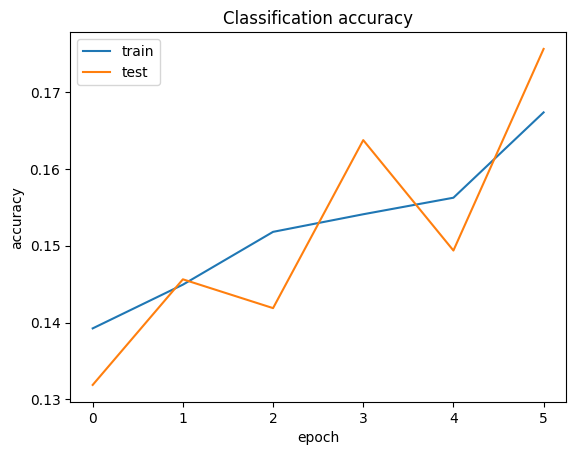

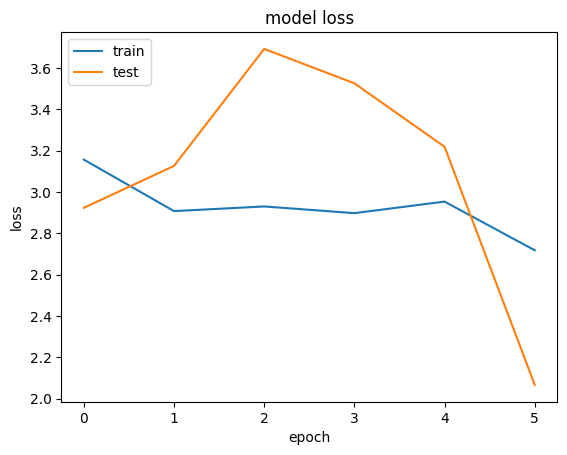

In [20]:

# summarize history for accuracy
plt.plot(history.history['classify_accuracy'])
plt.plot(history.history['val_classify_accuracy'])
plt.title('Classification accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['classify_loss'])
plt.plot(history.history['val_classify_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

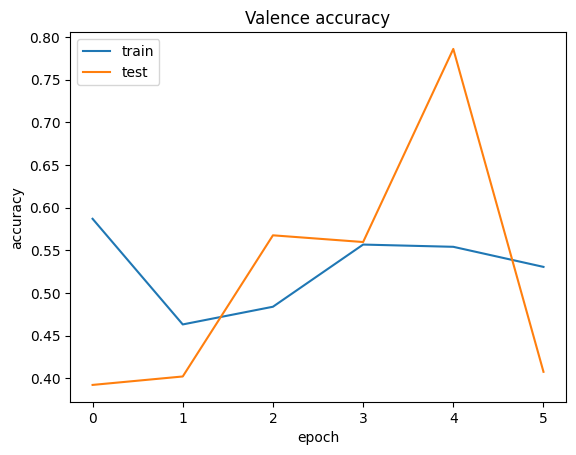

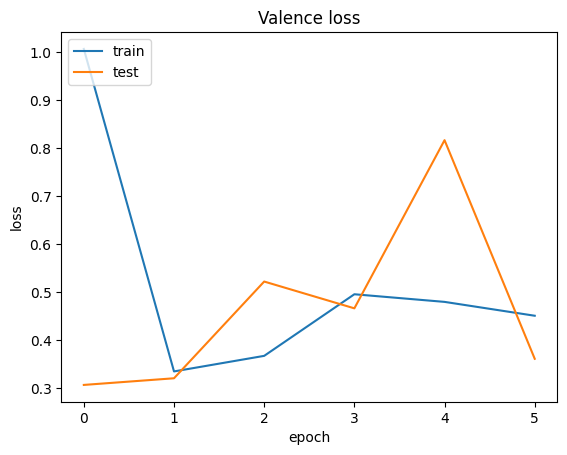

In [21]:
# summarize history for accuracy
plt.plot(history.history['valence_mean_absolute_error'])
plt.plot(history.history['val_valence_mean_absolute_error'])
plt.title('Valence accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['valence_loss'])
plt.plot(history.history['val_valence_loss'])
plt.title('Valence loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

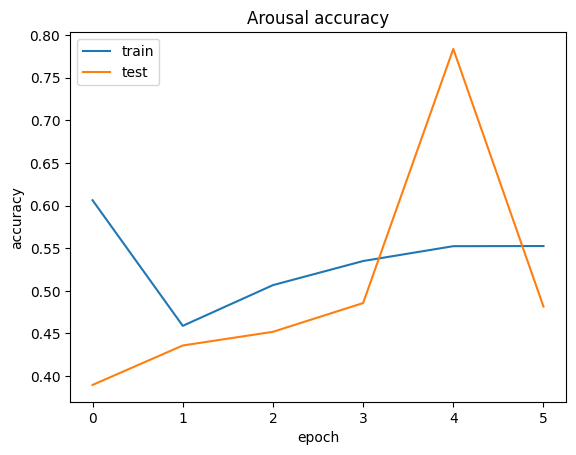

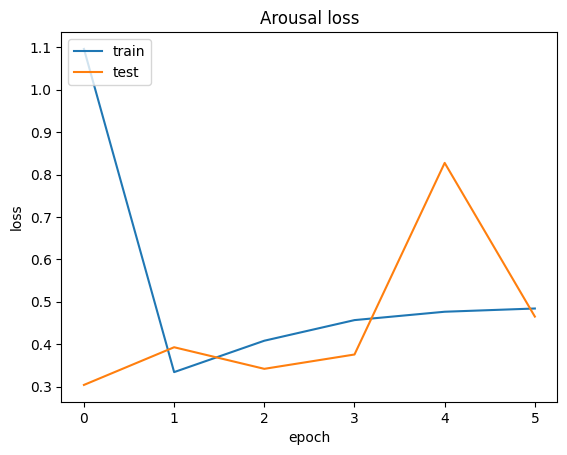

In [22]:
# summarize history for accuracy
plt.plot(history.history['arousal_mean_absolute_error'])
plt.plot(history.history['val_arousal_mean_absolute_error'])
plt.title('Arousal accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['arousal_loss'])
plt.plot(history.history['val_arousal_loss'])
plt.title('Arousal loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [12]:
model = load_model(r'ResNet50')

In [44]:
model2 = load_model(r'VGG16')

In [13]:
model

In [15]:
predictions = model.predict(test_gen)

50/50 [==============================] - 217s 4s/step


In [45]:
predictions2 = model2.predict(test_gen)

50/50 [==============================] - 253s 5s/step


In [20]:
predictions[0].shape,predictions[1].shape,predictions[2].shape

((1600, 8), (1600, 1), (1600, 1))

In [21]:
predictions = np.argmax(predictions[0],axis=1)
valence_val = predictions[1]
arousal_val = predictions[2]

In [46]:
predictions2 = np.argmax(predictions2[0],axis=1)
valence_val2 = predictions2[1]
arousal_val2 = predictions2[2]

In [24]:
test_gen.labels[0]

array([4., 0., 5., ..., 2., 1., 0.])

<AxesSubplot: >

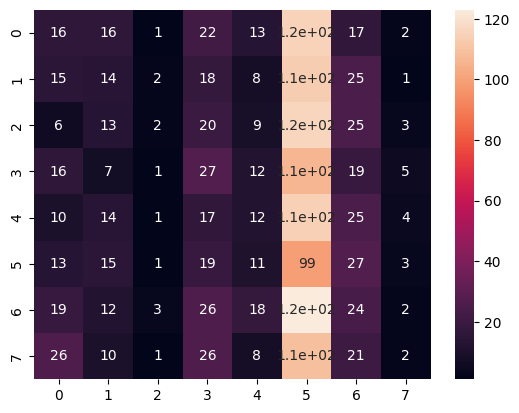

In [26]:

import seaborn as sns
sns.heatmap(confusion_matrix(test_gen.labels[0],predictions),annot=True)

<AxesSubplot: >

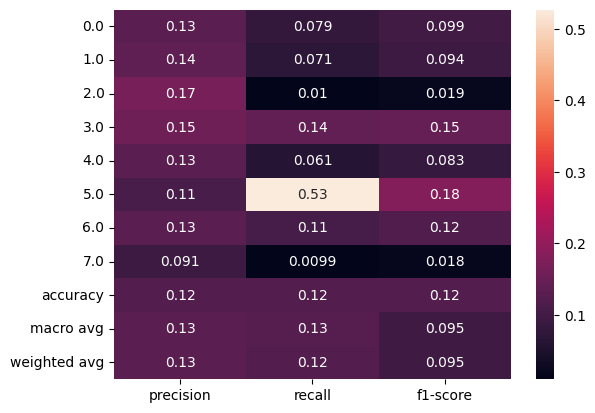

In [30]:
clf_report = classification_report(test_gen.labels[0],
                                   predictions,
                                   labels=labels,
                                   output_dict=True)
###Create a dataframe from the dictionary and plot a heatmap of it.

# .iloc[:-1, :] to exclude support
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)

<AxesSubplot: >

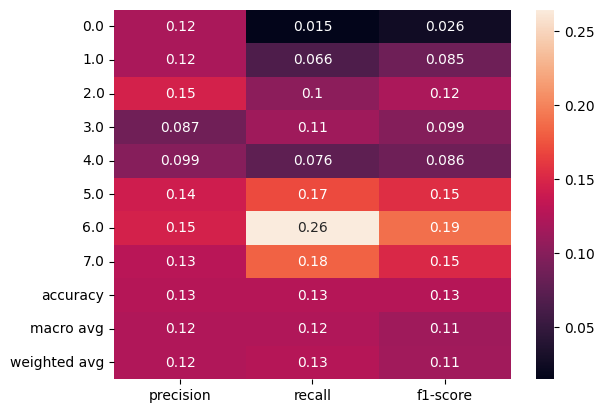

In [48]:
clf_report2 = classification_report(test_gen.labels[0],
                                   predictions2,
                                   labels=labels,
                                   output_dict=True)
###Create a dataframe from the dictionary and plot a heatmap of it.

# .iloc[:-1, :] to exclude support
sns.heatmap(pd.DataFrame(clf_report2).iloc[:-1, :].T, annot=True)

<AxesSubplot: >

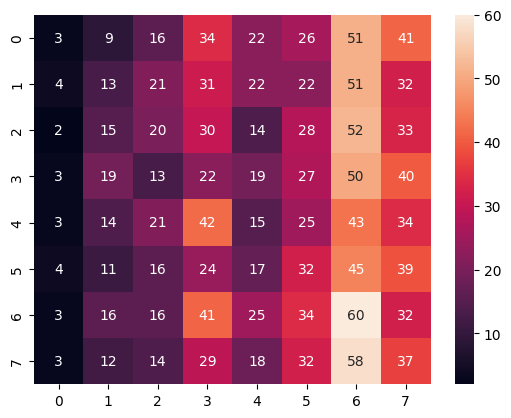

In [47]:

import seaborn as sns
sns.heatmap(confusion_matrix(test_gen.labels[0],predictions2),annot=True)

In [31]:
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(test_gen.labels[0],predictions)

0.00047386722373876644

In [49]:
cohen_kappa_score(test_gen.labels[0],predictions2)

-0.0011579021337715378

In [37]:
import krippendorff
alpha = krippendorff.alpha(test_gen.labels[0])
print(alpha)

-2.220446049250313e-16


In [51]:
from sklearn.metrics import r2_score
np.sqrt(r2_score(test_gen.labels[1],valence_val))

TypeError: Singleton array 5 cannot be considered a valid collection.

In [53]:
test_gen.labels[1].shape,valence_val

((1600,), 5)

In [54]:
predic

5